In [25]:
import os
import numpy as np
import pandas as pd
import networkx as nx
from scipy import stats as st
import matplotlib.pyplot as plt
from directedscalefree import get_degree_distributions, simulate_gene_network
import inspect

In [26]:
stats_dir = os.path.join("..", "stats", "ba_graphs", "feedforwardloops")

In [27]:
stats = os.listdir(stats_dir)

In [28]:
x_axis = []
y_axis = []

edge_axis = []
z_score_axis = []
t_score_axis = []

for file in stats:
    if not file.endswith(".csv"):
        continue
    
    edges = int(file.split("_")[1])
    
    fp = os.path.join(stats_dir,file)
    
    frequencies = np.genfromtxt(fp, delimiter=",")
    
    for freq in frequencies:
        x_axis += [edges]
        y_axis += [freq]
        
    z = (frequencies.mean() - 40) / (frequencies.std() / len(frequencies) ** 0.5)
    prob = st.norm.cdf(z)
    t_score, _ = st.ttest_1samp(frequencies, 40)
    t_score_axis += [t_score]
    z_score_axis += [prob]
    edge_axis += [edges]
    

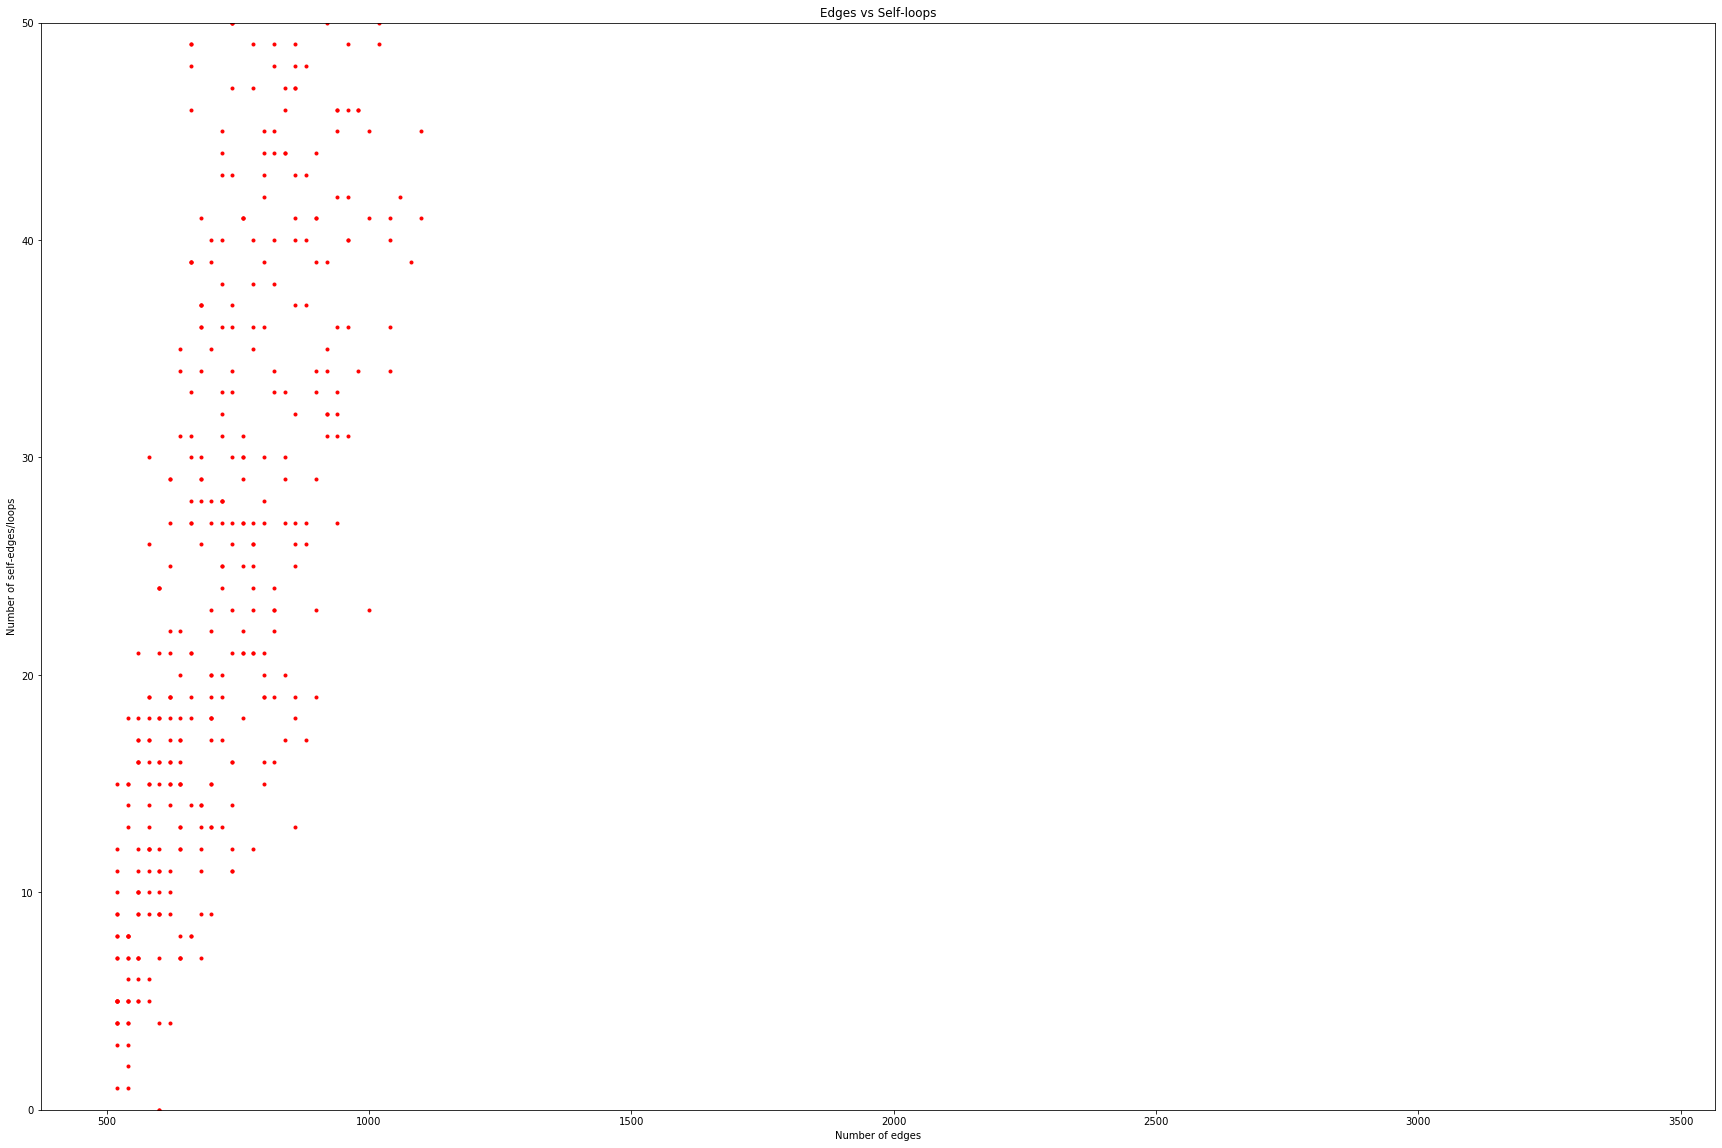

In [31]:
plt.figure(figsize=(30,20))
plt.scatter(x_axis, y_axis, c="red", marker=".")
plt.xlabel("Number of edges")
plt.ylabel("Number of self-edges/loops")
plt.title("Edges vs Self-loops")
#plt.savefig("edges_vs_selfloops.png")
plt.ylim((0,50))
plt.show()


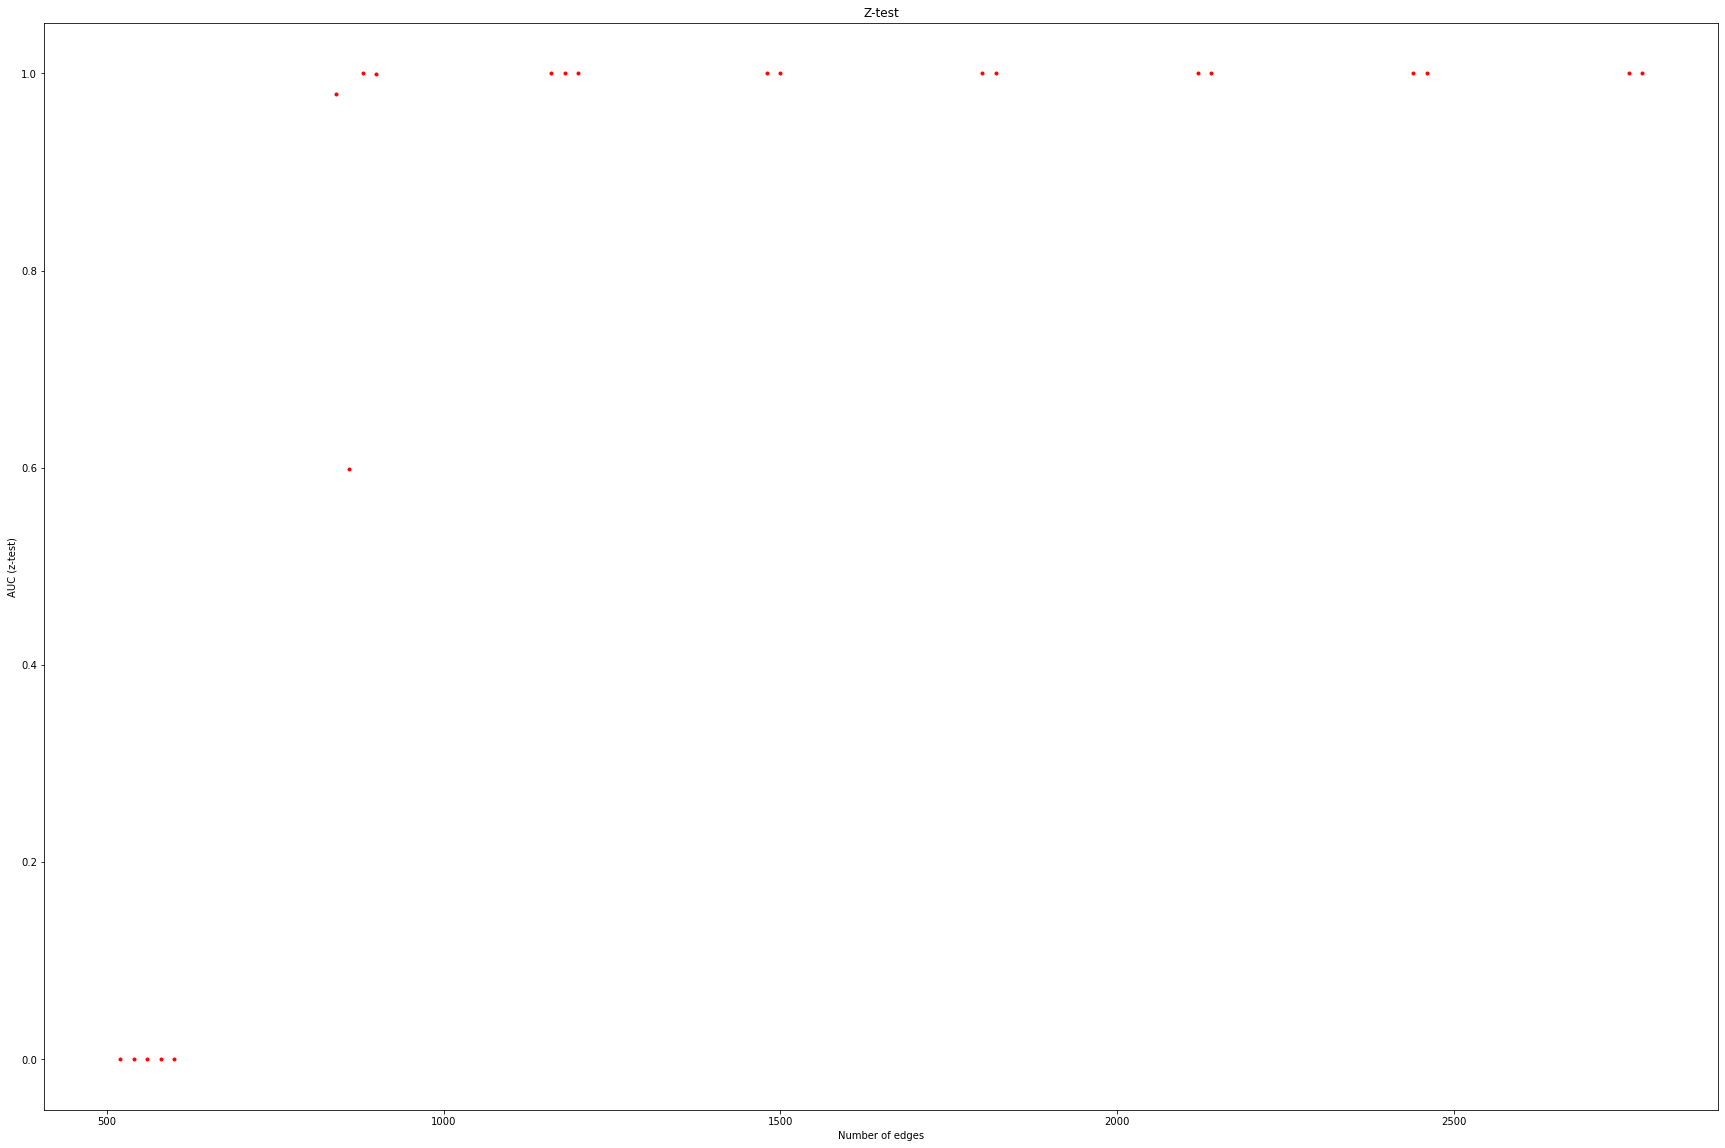

In [16]:
plt.figure(figsize=(30,20))
plt.scatter(edge_axis, z_score_axis, c="red", marker=".")
plt.xlabel("Number of edges")
plt.ylabel("AUC (z-test)")
plt.title("Z-test")
#plt.savefig("edges_vs_auc.png")
plt.show()

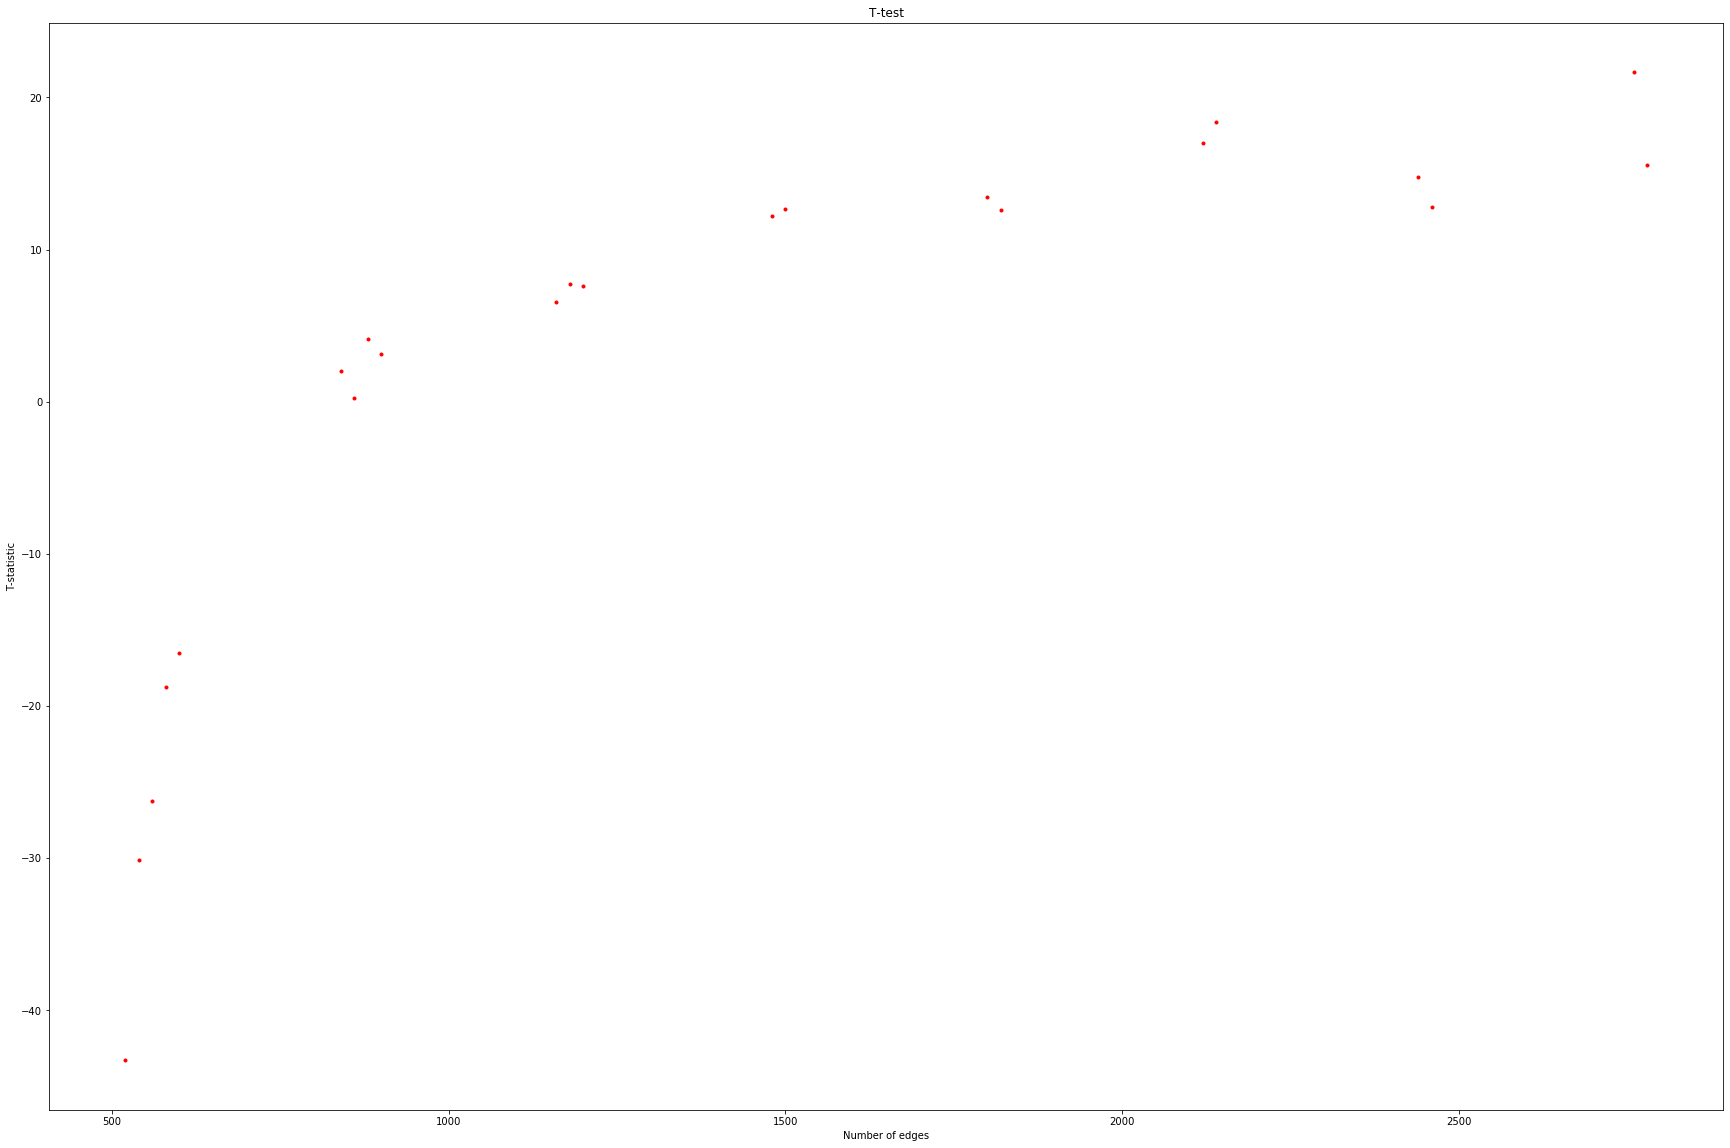

In [17]:
plt.figure(figsize=(30,20))
plt.scatter(edge_axis, t_score_axis, c="red", marker=".")
plt.xlabel("Number of edges")
plt.ylabel("T-statistic")
plt.title("T-test")
#plt.savefig("edges_vs_t_stat.png")
plt.show()

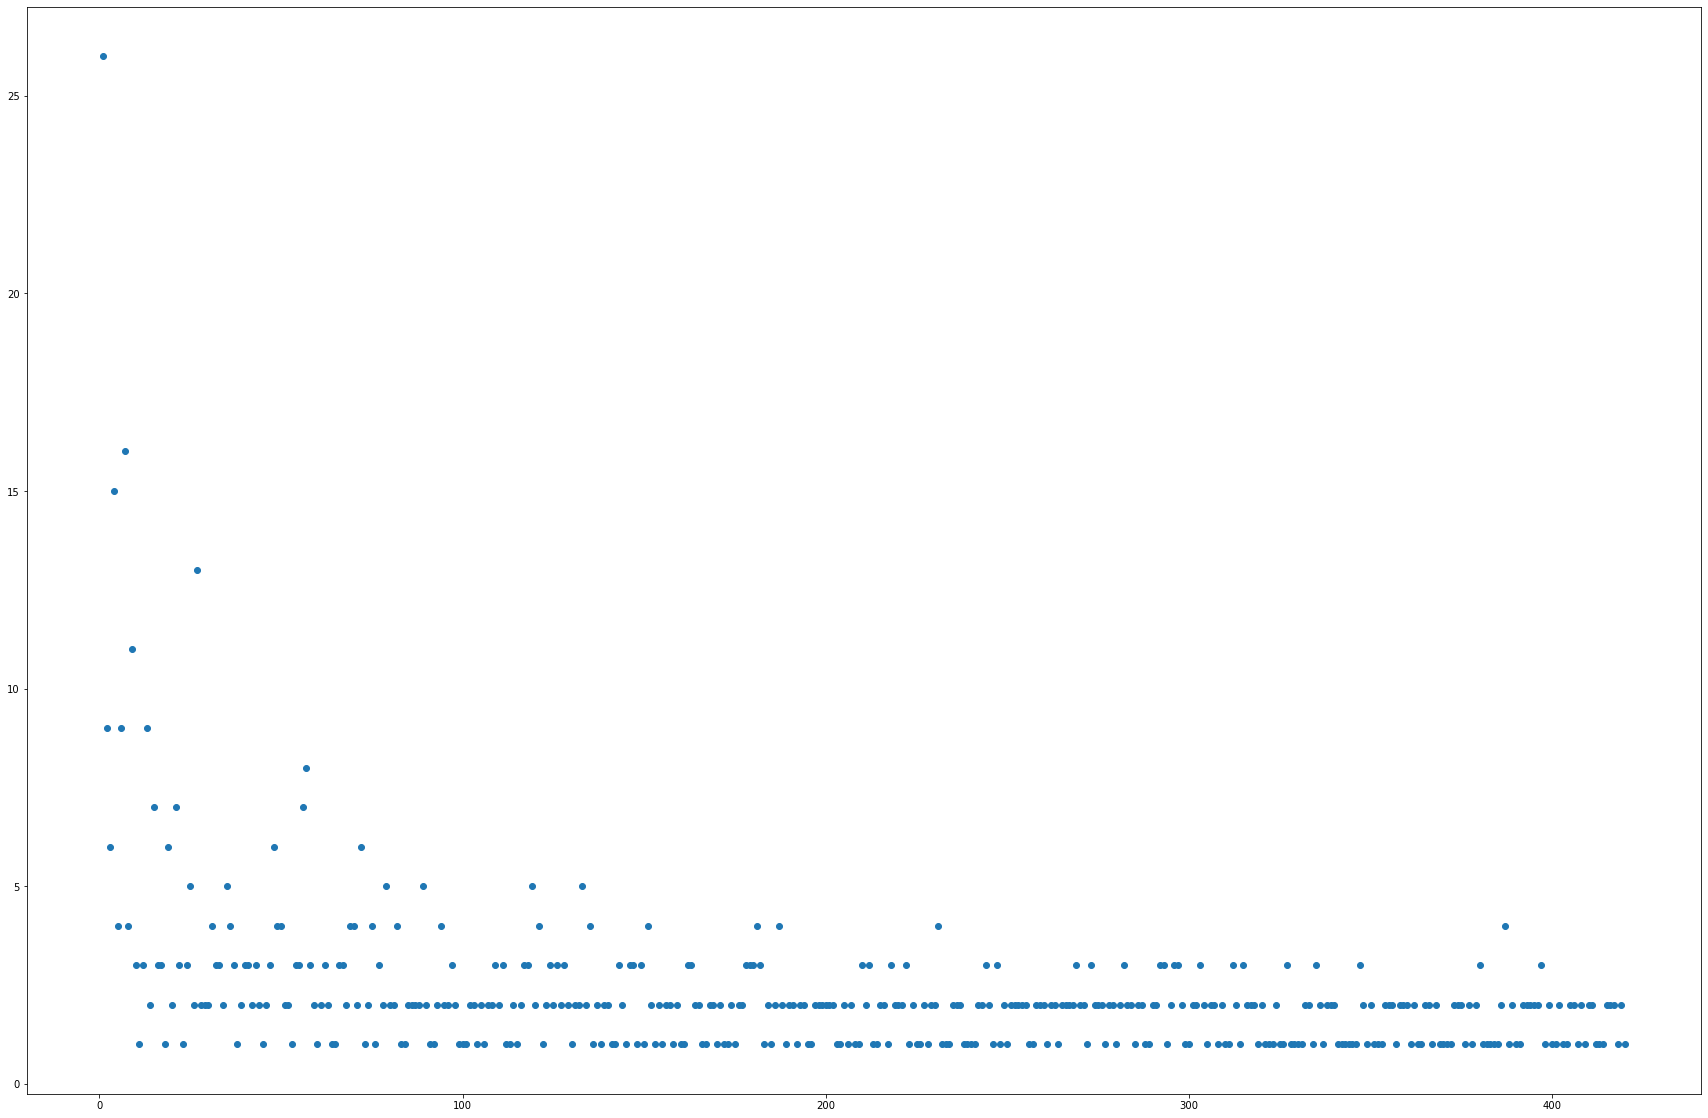

In [24]:
plt.figure(figsize=(30,20))
graph = nx.read_edgelist("../graphs/ba_graphs/420_520/420_520_0.edgelist", create_using=nx.DiGraph())
out = get_degree_distributions(graph)["indegrees"]
plt.scatter(np.arange(0,len(out)) + 1, list(map(lambda x: x + 1, out)))
#plt.plot(out)
#plt.savefig("420_133.png")
#plt.loglog()
plt.show()

In [19]:
graph = nx.read_edgelist("graphs/directed_graphs/420_1000/420_1000_0.edgelist", create_using=nx.DiGraph())

FileNotFoundError: [Errno 2] No such file or directory: 'graphs/directed_graphs/420_1000/420_1000_0.edgelist'

In [28]:
for i,j in graph.edges():
    print(type(i))
    break

<class 'str'>


In [37]:
nodes = graph.number_of_nodes()
indegrees = [0 for i in range(nodes)]
outdegrees = [0 for i in range(nodes)]
for outgoing_node, incoming_node in graph.edges():
    outdegrees[int(outgoing_node)] += 1
    indegrees[int(incoming_node)] += 1

In [48]:
def get_degree_distributions(graph):
    nodes = graph.number_of_nodes()
    indegrees = [0 for i in range(nodes)]
    outdegrees = [0 for i in range(nodes)]
    for outgoing_node, incoming_node in graph.edges():
        outdegrees[int(outgoing_node)] += 1
        indegrees[int(incoming_node)] += 1
    return {"indegrees":indegrees,
            "outdegrees":outdegrees}

In [71]:
get_degree_distributions(graph)

{'indegrees': [1,
  1,
  2,
  3,
  3,
  2,
  1,
  2,
  4,
  1,
  1,
  2,
  1,
  2,
  1,
  3,
  1,
  3,
  1,
  3,
  1,
  2,
  2,
  3,
  3,
  1,
  3,
  1,
  3,
  2,
  1,
  2,
  1,
  3,
  4,
  3,
  3,
  3,
  2,
  2,
  2,
  3,
  4,
  2,
  1,
  1,
  3,
  2,
  3,
  1,
  4,
  5,
  1,
  3,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  3,
  2,
  2,
  3,
  3,
  3,
  4,
  1,
  2,
  2,
  3,
  1,
  3,
  1,
  1,
  5,
  1,
  3,
  3,
  1,
  4,
  2,
  1,
  3,
  1,
  3,
  4,
  2,
  3,
  5,
  1,
  1,
  1,
  2,
  2,
  1,
  4,
  3,
  2,
  2,
  2,
  2,
  3,
  2,
  3,
  2,
  2,
  2,
  1,
  2,
  2,
  2,
  4,
  2,
  2,
  2,
  3,
  2,
  3,
  2,
  3,
  3,
  1,
  3,
  3,
  1,
  4,
  1,
  3,
  3,
  3,
  3,
  1,
  3,
  2,
  2,
  2,
  1,
  2,
  3,
  5,
  3,
  2,
  3,
  1,
  2,
  6,
  1,
  2,
  4,
  3,
  3,
  2,
  2,
  5,
  3,
  3,
  1,
  3,
  4,
  1,
  2,
  2,
  3,
  2,
  2,
  1,
  2,
  1,
  1,
  1,
  3,
  4,
  2,
  2,
  2,
  1,
  2,
  1,
  3,
  2,
  5,
  2,
  2,
  4,
  2,
  2,
  2,
  3,
  3,
  3,
  1,
  2,
  3,
  

In [55]:
simulate_gene_network(100,200)

In [61]:
source_DF = inspect.getsource(get_degree_distributions)

In [63]:
print(source_DF)

def get_degree_distributions(graph):
    nodes = graph.number_of_nodes()
    indegrees = [0 for i in range(nodes)]
    outdegrees = [0 for i in range(nodes)]
    for (outgoing_node, incoming_node) in graph.edges():
        outdegrees[int(outgoing_node)] += 1
        indegrees[int(incoming_node)] += 1
    return {"indegrees":indegrees, "outdegrees":outdegrees}



In [64]:
source_DF

'def get_degree_distributions(graph):\n    nodes = graph.number_of_nodes()\n    indegrees = [0 for i in range(nodes)]\n    outdegrees = [0 for i in range(nodes)]\n    for (outgoing_node, incoming_node) in graph.edges():\n        outdegrees[int(outgoing_node)] += 1\n        indegrees[int(incoming_node)] += 1\n    return {"indegrees":indegrees, "outdegrees":outdegrees}\n'